<div style="background-color: #c3e8fb; padding: 10px; color: #144d84;">
<b>Exercise 1) DenseNet Model with Webcam</b><br>
Use the DenseNet-121 model, which was published in CVPR 2017, and write code that captures video from a webcam. When you point the webcam at an object, write the object's name on the image. Instead of using the webcam, use a short video you have recorded as input.
</div>

In [2]:
import os
print(os.path.expanduser('~/.keras/models'))

C:\Users\Lee/.keras/models


In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.applications.densenet import DenseNet121, preprocess_input, decode_predictions
from keras.preprocessing import image

In [4]:
model = DenseNet121(weights='imagenet')

def inference(x):
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x, verbose=0)
    return decode_predictions(preds, top=1)[0][0][1]

In [4]:
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame = cv2.flip(frame, flipCode=1)
    frame2 = cv2.resize(frame, (224, 224))
    predicted = inference(frame2[...,::-1])
    cv2.putText(frame,  predicted, (30, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 255), lineType=cv2.LINE_AA)
    cv2.imshow('Webcam', frame)
    if cv2.waitKey(1) == 27: # 27 is escape key
        break

cap.release()
cv2.destroyAllWindows()

In [13]:
# # Define the codec and create VideoWriter object
# fourcc = cv2.VideoWriter_fourcc(*'XVID')  # You can also use 'MP4V' for .mp4 files
# output_file = 'output_video.avi'  # Change this to 'output_video.mp4' if using MP4 codec
# fps = 20.0  # Frames per second
# frame_width = int(cap.get(3))  # Width of the frame
# frame_height = int(cap.get(4))  # Height of the frame

# # Create VideoWriter object
# out = cv2.VideoWriter(output_file, fourcc, fps, (frame_width, frame_height))

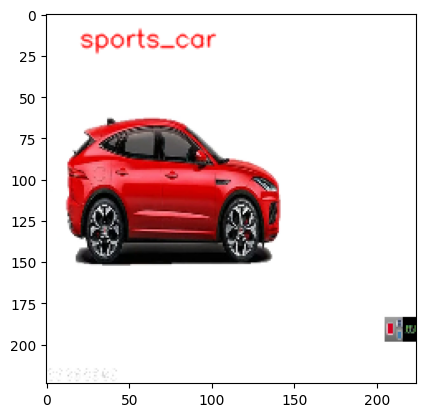

In [21]:
cap = cv2.VideoCapture('test_video.mp4')
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame = cv2.resize(frame, (224, 224))
    predicted = inference(frame[...,::-1])
    cv2.putText(frame,  predicted, (20, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), lineType=cv2.LINE_AA)
    cv2.imshow('Webcam', frame)
    if cv2.waitKey(1) == 27: # 27 is escape key
        break

cap.release()
cv2.destroyAllWindows()
plt.imshow(frame[...,::-1])

In [12]:
# cap = cv2.VideoCapture('test_video.mp4')
# while True:
#     ret, frame = cap.read()
#     if not ret:
#         break
#     frame = cv2.resize(frame, (224, 224))
#     predicted = inference(frame[...,::-1])
#     cv2.putText(frame,  predicted, (20, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), lineType=cv2.LINE_AA)
#     out.write(frame)
#     cv2.imshow('Webcam', frame)
#     if cv2.waitKey(1) == 27: # 27 is escape key
#         break

# cap.release()
# out.release()
# cv2.destroyAllWindows()
# plt.imshow(frame[...,::-1])